In [10]:
import fitsio
import numpy as np
import proplot as pplt
from des_y6utils.mdet import make_mdet_cuts
import glob
import os

## test size cut

In [ ]:
d = fitsio.read(
    "/gpfs02/astro/desdata/esheldon/lensing/des-lensing/y6patches/patches/patch-0000.fits"
)

In [ ]:
d.shape

In [ ]:
msk = (
    d["wmom_T_ratio"] >= np.maximum(
        1.2,
        (1.0 + 3.0*d["wmom_T_err"]/d["wmom_psf_T"])
    )
)

In [ ]:
fig, axs = pplt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axs[0].hexbin(
    np.log10(d[msk]["wmom_s2n"]), 
    d[msk]["wmom_T_ratio"], 
    norm="log",
    extent=(np.log10(5), 5, 0, 9),
)

axs[1].hexbin(
    np.log10(d[~msk]["wmom_s2n"]), 
    d[~msk]["wmom_T_ratio"], 
    norm="log",
    extent=(np.log10(5), 5, 0, 9),
)

### get total number

In [2]:
fnames = glob.glob(
    "/astro/u/beckermr/workarea/des-y6-analysis/2022_08_24_blind_and_test_final_cats/blinded_data/*.fits"
)

In [13]:
tot = 0
for i, fname in enumerate(fnames):
    d = fitsio.read(fname)
    tot += np.sum(make_mdet_cuts(d, 3, verbose=True) & (d["mdet_step"] == "noshear"))
    print("%d %e %e" % (
        i+1, tot/1e6, tot/(i+1)*len(fnames)/1e6
    ), flush=True)

did cut psfrec_flags 673117
did cut wmom_flags 673112
did cut pgauss_T_flags 673112
did cut pgauss_band_flux_flags_g 673112
did cut pgauss_band_flux_flags_r 673112
did cut pgauss_band_flux_flags_i 673112
did cut pgauss_band_flux_flags_z 673112
did cut mask_flags 673112
did cut shear_bands 316248
did cut pgauss_s2n 294675
did mdet cuts 75825
did mask cuts 61100
1 1.221600e-02 1.242245e+02
did cut psfrec_flags 713575
did cut wmom_flags 713575
did cut pgauss_T_flags 713575
did cut pgauss_band_flux_flags_g 713575
did cut pgauss_band_flux_flags_r 713575
did cut pgauss_band_flux_flags_i 713575
did cut pgauss_band_flux_flags_z 713575
did cut mask_flags 713575
did cut shear_bands 328539
did cut pgauss_s2n 306609
did mdet cuts 74534
did mask cuts 62987
2 2.484300e-02 1.263142e+02
did cut psfrec_flags 745048
did cut wmom_flags 745048
did cut pgauss_T_flags 745048
did cut pgauss_band_flux_flags_g 745048
did cut pgauss_band_flux_flags_r 745048
did cut pgauss_band_flux_flags_i 745048
did cut pgauss

KeyboardInterrupt: 

did cut psfrec_flags 673117
did cut wmom_flags 673112
did cut pgauss_T_flags 673112
did cut pgauss_band_flux_flags_g 673112
did cut pgauss_band_flux_flags_r 673112
did cut pgauss_band_flux_flags_i 673112
did cut pgauss_band_flux_flags_z 673112
did cut mask_flags 673112
did cut shear_bands 316248
did cut pgauss_s2n 294675
did mdet cuts 75825
did cut psfrec_flags 673117
did cut wmom_flags 673112
did cut pgauss_T_flags 673112
did cut pgauss_band_flux_flags_g 673112
did cut pgauss_band_flux_flags_r 673112
did cut pgauss_band_flux_flags_i 673112
did cut pgauss_band_flux_flags_z 673112
did cut mask_flags 673112
did cut shear_bands 316248
did cut pgauss_s2n 294675
did mdet cuts 75825
did mask cuts 33093
did cut psfrec_flags 673117
did cut wmom_flags 673112
did cut pgauss_T_flags 673112
did cut pgauss_band_flux_flags_g 673112
did cut pgauss_band_flux_flags_r 673112
did cut pgauss_band_flux_flags_i 673112
did cut pgauss_band_flux_flags_z 673112
did cut mask_flags 673112
did cut shear_bands 3162

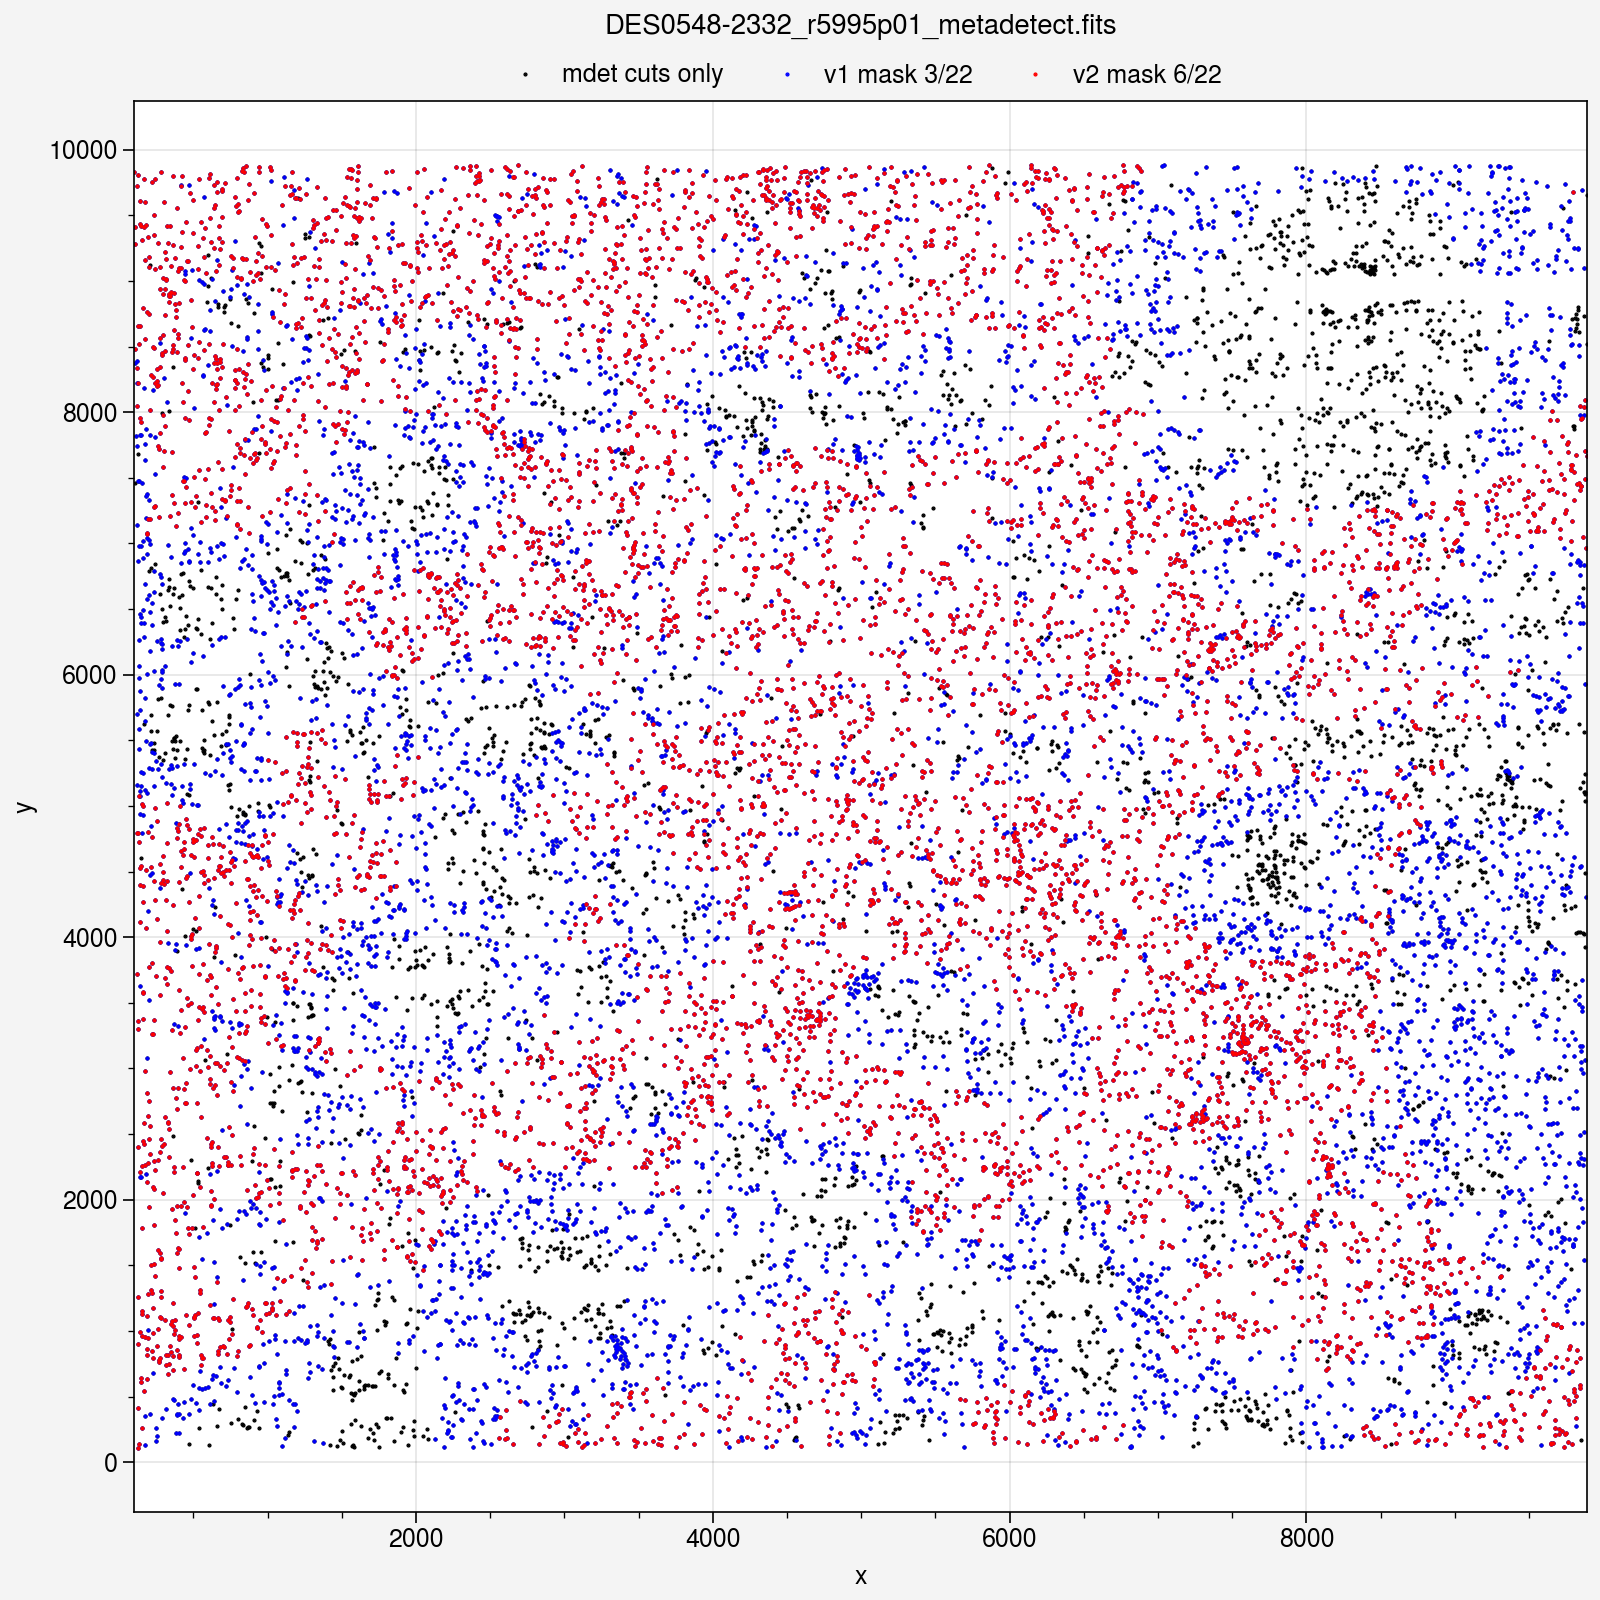

In [12]:
ind = 0
d = fitsio.read(fnames[ind])
msk_mdet = make_mdet_cuts(d, 2, verbose=True) & (d["mdet_step"] == "noshear")
msk_msk = make_mdet_cuts(d, 1, verbose=True) & (d["mdet_step"] == "noshear")
msk_msk_old = make_mdet_cuts(d, 3, verbose=True) & (d["mdet_step"] == "noshear")

fig, axs = pplt.subplots(figsize=(8, 8))
axs.plot(d["x"][msk_mdet], d["y"][msk_mdet], "k.", ms=1, label="mdet cuts only")
axs.plot(d["x"][msk_msk_old], d["y"][msk_msk_old], "b.", ms=1, label="v1 mask 3/22")
axs.plot(d["x"][msk_msk], d["y"][msk_msk], "r.", ms=1, label="v2 mask 6/22")
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.set_title(os.path.basename(fnames[ind]))
axs.legend(loc="t", frameon=False)

In [14]:
import glob

tot = 0
fnames = glob.glob(
    "/gpfs02/astro/desdata/esheldon/lensing/des-lensing/y6patches/patches/*.fits"
)
for i, fname in enumerate(fnames):
    d = fitsio.read(fname)
    tot += np.sum(make_mdet_cuts(d, 3) & (d["mdet_step"] == "noshear"))
    print("%d %e %e" % (
        i+1, tot/1e6, tot/(i+1)*200/1e6
    ), flush=True)

print("total:", tot)

1 4.762980e-01 9.525960e+01
2 9.781570e-01 9.781570e+01
3 1.607247e+00 1.071498e+02
4 2.077427e+00 1.038714e+02
5 2.758382e+00 1.103353e+02
6 3.501397e+00 1.167132e+02
7 4.072897e+00 1.163685e+02
8 4.745958e+00 1.186489e+02
9 5.399424e+00 1.199872e+02
10 6.114408e+00 1.222882e+02
11 6.812986e+00 1.238725e+02
12 7.450852e+00 1.241809e+02
13 8.072670e+00 1.241949e+02
14 8.716426e+00 1.245204e+02
15 9.552048e+00 1.273606e+02
16 1.030509e+01 1.288137e+02
17 1.106042e+01 1.301225e+02
18 1.185826e+01 1.317584e+02
19 1.262504e+01 1.328952e+02
20 1.340338e+01 1.340338e+02
21 1.410425e+01 1.343262e+02
22 1.487038e+01 1.351853e+02
23 1.577474e+01 1.371717e+02
24 1.659311e+01 1.382759e+02
25 1.746298e+01 1.397038e+02
26 1.792527e+01 1.378867e+02
27 1.852521e+01 1.372238e+02
28 1.918095e+01 1.370068e+02
29 1.993828e+01 1.375054e+02
30 2.066524e+01 1.377683e+02
31 2.136073e+01 1.378112e+02
32 2.202073e+01 1.376296e+02
33 2.268330e+01 1.374745e+02
34 2.345541e+01 1.379730e+02
35 2.415079e+01 1.38004